<a href="https://colab.research.google.com/github/hamzafarooq/building-llm-applications-from-scratch/blob/main/Module%202/Module_2_basic_llms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentence Transformers are powerful encoders

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("BAAI/bge-base-en-v1.5")
#model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = [
    "it caught him off guard that space smelled of seared steak",
    "she could not decide between painting her teeth or brushing her nails",
    "he thought there'd be sufficient time is he hid his watch",
    "the bees decided to have a mutiny against their queen",
    "the sign said there was road work ahead so she decided to speed up",
    "on a scale of one to ten, what's your favorite flavor of color?",
    "flying stinging insects rebelled in opposition to the matriarch"
]

In [ ]:
long_text = ["""
Comparing the cosine similarity scores, we see that by introducing the word "elephant" instead of "mouse" in Sentence 2, the cosine similarity score increased from approximately 0.856 (without noise) to approximately 0.898 (with noise).
This demonstrates how noise can affect the similarity measurement between sentences.
"""]


In [ ]:
len(long_text)

1

In [ ]:
len(sentences)

7

Convert the text into a dense vector

In [ ]:
embeddings = model.encode(sentences)
embeddings.shape

(7, 768)

In [ ]:
#the bees decided to have a mutiny against their queen
#"flying stinging insects rebelled in opposition to the matriarch"

In [ ]:
embeddings[0]

array([-3.11309975e-02, -6.33348245e-03, -3.15453261e-02, -9.38075595e-03,
        2.93191429e-02, -4.42197137e-02,  4.61156480e-03,  7.03319721e-03,
        2.35604998e-02, -2.24433467e-02, -7.09381187e-03,  7.69083295e-03,
       -2.86267065e-02, -1.05867488e-02,  4.92583960e-02,  5.61846495e-02,
        5.43212816e-02,  6.44918473e-04,  1.45956324e-02, -7.99637288e-03,
        3.19179296e-02,  1.43817738e-02,  1.94561817e-02,  4.02895212e-02,
        1.64064346e-03,  2.12156330e-03, -1.24322446e-02, -4.86925477e-03,
       -6.44296557e-02,  2.58044042e-02,  2.62061786e-02, -1.19880529e-03,
        8.56431108e-03, -8.14263821e-02,  3.10381991e-03,  2.83655571e-03,
       -1.34972483e-02, -3.67679447e-02, -3.28232273e-02,  5.16221523e-02,
       -5.78199029e-02,  6.28134385e-02,  5.80596225e-03,  4.21530865e-02,
       -2.54804902e-02,  2.08834726e-02, -4.08995599e-02, -1.11355660e-02,
       -2.49521043e-02, -2.69315969e-02, -1.93051305e-02, -2.66540032e-02,
        5.13588823e-02, -

In [ ]:
# "it caught him off guard that space smelled of seared steak",

#


In [ ]:
from sentence_transformers.util import cos_sim

scores = cos_sim(embeddings[0], embeddings[1:])

print(sentences[0])
for i, score in enumerate(scores[0]):
    print(f"{round(score.item(), 4)} | {sentences[i+1]}")

it caught him off guard that space smelled of seared steak
0.4394 | she could not decide between painting her teeth or brushing her nails
0.5773 | he thought there'd be sufficient time is he hid his watch
0.38 | the bees decided to have a mutiny against their queen
0.4003 | the sign said there was road work ahead so she decided to speed up
0.3709 | on a scale of one to ten, what's your favorite flavor of color?
0.3999 | flying stinging insects rebelled in opposition to the matriarch


- simple exercise:
-Sentence 1: The boy ran upstairs
-Sentence 2: The girl ran upstairs
-Sentence 3: The cat ran upstairs
-Sentence 4: The cat ran outside

Sentence 1 and 2 : 0.74999
Sentence 1 and 3: 0.7009
Sentence 1 and 4:

In [ ]:
#Sentence 1 and 2 : 0.74999
#Sentence 1 and 3: 0.7009
#Sentence 3 and 4: 0.3317
#Sentence 1 and 4: 0.3897

In [ ]:

# scores = cos_sim(embeddings[0], embeddings[:-1])

# print(sentences[-1])
# for i, score in enumerate(scores[0]):
#     print(f"{round(score.item(), 4)} | {sentences[i]}")

#Question Answer

In [ ]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer, DPRQuestionEncoder, DPRQuestionEncoderTokenizer
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
questions = [
    "what is the capital city of australia?",
    "what is the best selling sci-fi book?",
    "how many searches are performed on Google?",
    "how many students are there in ML system design class?",
    "Why is the sky blue?"
]

contexts = [
    "canberra is the capital city of australia",
    "the capital city of france is paris",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "Google serves more than 2 trillion queries annually",
    "Google is a popular search engine",
    "The number of students in ML System design class is 22"
]

In [ ]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length',
                          truncation=True, return_tensors='pt')
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length',
                               truncation=True, return_tensors='pt')
xq = question_model(**xq_tokens)

In [ ]:
xb.pooler_output.shape, xq.pooler_output.shape

(torch.Size([7, 768]), torch.Size([5, 768]))

In [ ]:
import torch

for i, xq_vec in enumerate(xq.pooler_output):
    probs = cos_sim(xq_vec, xb.pooler_output)
    argmax = torch.argmax(probs)
    print(questions[i])
    print(contexts[argmax])
    print('---')

what is the capital city of australia?
canberra is the capital city of australia
---
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
---
how many searches are performed on Google?
Google serves more than 2 trillion queries annually
---
how many students are there in ML system design class?
The number of students in ML System design class is 22
---
Why is the sky blue?
the best-selling sci-fi book is dune
---


#Image-Text Embedding

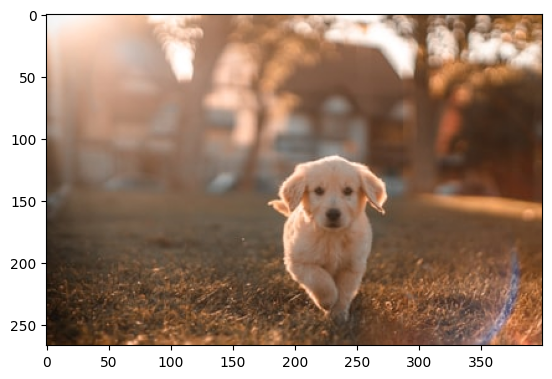

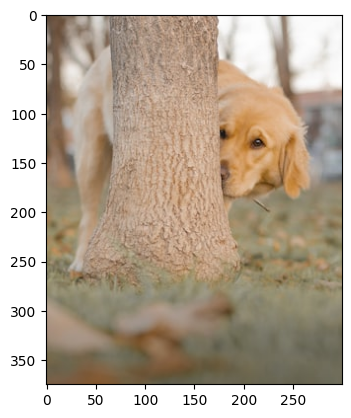

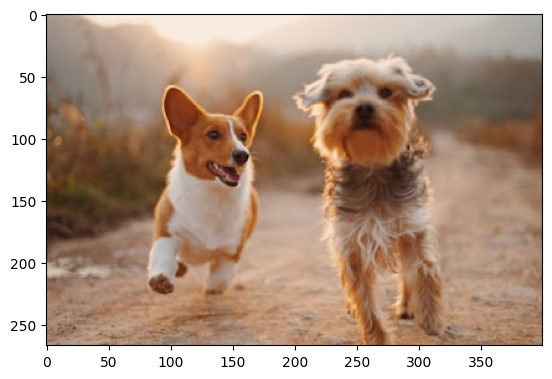

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "a cucumber on a tree",
            "trees in the park",
            "a cucumber dog"]
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([2, 0, 1])

a dog running


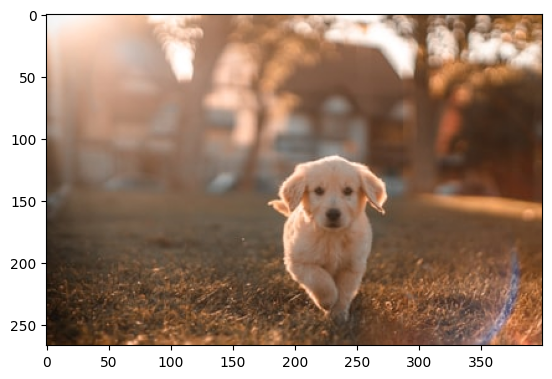

a dog hiding behind a tree


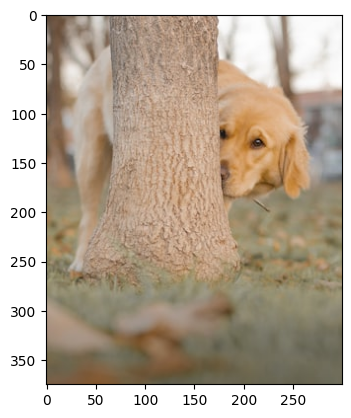

two dogs running


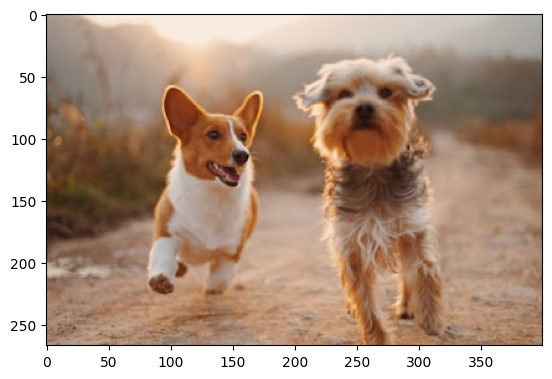

In [ ]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))

In [ ]:
# requirements:
! pip install huggingface_hub accelerate
! git config --global credential.helper store

##Cosine Similarity

In [ ]:
import numpy as np

def calculate_cosine_similarity(sentence1, sentence2):
    # Create a set of unique words from both sentences
    word_set = set(sentence1.split() + sentence2.split())

    # Create vectors representing the frequency of each word in each sentence
    vector1 = np.array([sentence1.split().count(word) for word in word_set])
    vector2 = np.array([sentence2.split().count(word) for word in word_set])

    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the magnitude of each vector
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the cosine similarity
    cosine_similarity = dot_product / (magnitude1 * magnitude2)

    return cosine_similarity

# Test the function
sentence1 = "The cat chased the mouse."
sentence2 = "The cat chased the mouse in the garden."
sentence3 = "The mouse chased the elephant in the garden."

similarity_score = calculate_cosine_similarity(sentence1, sentence2)
print(f"The cosine similarity between the two sentences is: {similarity_score}")


The cosine similarity between the two sentences is: 0.7071067811865475


In [ ]:
# vector1 = np.array([sentence1.split().count(word) for word in word_set])

In [ ]:

similarity_score = calculate_cosine_similarity(sentence2, sentence3)
print(f"The cosine similarity between the two sentences is: {similarity_score}")

The cosine similarity between the two sentences is: 0.8999999999999998


# Hugging Face APIs
Let’s look into how Hugging Face APIs can help generate text using LLMs like Bloom, Roberta-base, etc. First, we need to sign up for Hugging Face and copy the token for API access. After signup, hover over to the profile icon on the top right, click on settings, and then Access Tokens.

**Example 1: Sentence Completion**

Let’s look at how we can use Bloom for sentence completion. The code below uses the hugging face token for API to send an API call with the input text and appropriate parameters for getting the best response.

In [ ]:
from huggingface_hub import notebook_login
from huggingface_hub import HfFolder


#enter your API key, you can make one for free on HF
notebook_login()

In [ ]:
from huggingface_hub import InferenceClient


inference = InferenceClient(model = "bigscience/bloom",token=HfFolder.get_token())

In [ ]:
import time
import json

def infer(prompt,
          max_length = 32,
          top_k = 0,
          num_beams = 0,
          no_repeat_ngram_size = 2,
          top_p = 0.9,
          seed=42,
          temperature=0.7,
          greedy_decoding = False,
          return_full_text = False):


    top_k = None if top_k == 0 else top_k
    do_sample = False if num_beams > 0 else not greedy_decoding
    num_beams = None if (greedy_decoding or num_beams == 0) else num_beams
    no_repeat_ngram_size = None if num_beams is None else no_repeat_ngram_size
    top_p = None if num_beams else top_p
    early_stopping = None if num_beams is None else num_beams > 0

    params = {
        "max_new_tokens": max_length,
        "top_k": top_k,
        "top_p": top_p,
        "temperature": temperature,
        "do_sample": do_sample,
        "seed": seed,
        "early_stopping":early_stopping,
        "no_repeat_ngram_size":no_repeat_ngram_size,
        "num_beams":num_beams,
        "return_full_text":return_full_text
    }

    s = time.time()
    response = inference.post(json = {"inputs": prompt, "params": params}, )
    #print(response)
    proc_time = time.time()-s
    #print(f"Processing time was {proc_time} seconds")
    return response.decode('utf-8')

In [ ]:
prompt = "The thing that makes large language models interesting is"
resp = json.loads(infer(prompt))

resp[0]['generated_text']

'The thing that makes large language models interesting is that they are very large. The largest models are in the hundreds of billions of parameters. This is'

**Example 2: Question Answers**

We can use the API for the Roberta-base model which can be a source to refer to and reply to. Let’s change the payload to provide some information about myself and ask the model to answer questions based on that.

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"
# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
res

{'score': 0.21171429753303528,
 'start': 59,
 'end': 84,
 'answer': 'gives freedom to the user'}

In [ ]:

import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name,return_dict=False)
tokenizer = AutoTokenizer.from_pretrained(model_name)

text = "Huggingface has democratized NLP. Huge thanks to Huggingface for this."
question = "What has Huggingface done ?"
encoding = tokenizer(question, text, return_tensors="pt")
input_ids = encoding["input_ids"]
# Transform input tokens




# default is local attention everywhere
# the forward method will automatically set global attention on question tokens
attention_mask = encoding["attention_mask"]

start_scores, end_scores = model(input_ids, attention_mask=attention_mask)
all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0].tolist())

answer_tokens = all_tokens[torch.argmax(start_scores) :torch.argmax(end_scores)+1]
answer = tokenizer.decode(tokenizer.convert_tokens_to_ids(answer_tokens))

In [ ]:
answer

' democratized NLP'

**Example** 3: Summarization

We can summarize using Large Language Models. Let’s summarize a long text describing large language models using the Bart Large CNN model. We modify the API URL and added the input text below:

In [ ]:
from pprint import pprint
import requests

API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-cnn"

def query(payload):
    response = requests.post(API_URL, json=payload)
    return response.json()

params = {'do_sample': False}

full_text = '''AI applications are summarizing articles, writing stories and
engaging in long conversations — and large language models are doing
the heavy lifting.

A large language model, or LLM, is a deep learning model that can
understand, learn, summarize, translate, predict, and generate text and other
content based on knowledge gained from massive datasets.

Large language models - successful applications of
transformer models. They aren’t just for teaching AIs human languages,
but for understanding proteins, writing software code, and much, much more.

In addition to accelerating natural language processing applications —
like translation, chatbots, and AI assistants — large language models are
used in healthcare, software development, and use cases in many other fields.'''

output = query({
    'inputs': full_text,
    'parameters': params
})

pprint(output)

{'error': 'Rate limit reached. Please log in or use a HF access token'}


**Example 4**

Restart your session

In [ ]:
#!pip install transformers --upgrade
!pip install transformers[agents]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

In [ ]:
#!pip install transformers[agents]
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


======== New task ========
Generate an image of a violet boat on a lake, with a red comet in the sky.
==== Agent is executing the code below:
# Generate the initial image
image = image_generator(prompt="A peaceful lake with a boat in the water.")
print(image)

# Add a violet color to the boat
image = image_generator(prompt="The same lake and boat, but with a violet-colored boat.")
print(image)

# Add a red comet in the sky
image = image_generator(prompt="The same lake and violet boat, with a red comet in the sky.")
final_answer(image)
====
Print outputs:
/tmp/tmpk1pvj92y/432d5b62-2f4a-4504-88ce-6b5a52183f03.png
/tmp/tmp0z0a7ca9/213d1f28-c358-41c8-8138-55ca0b33c716.png

>>> Final answer:
/tmp/tmpmx9mr0gj/df38a923-14a5-40f8-9260-000f0d2788b0.png


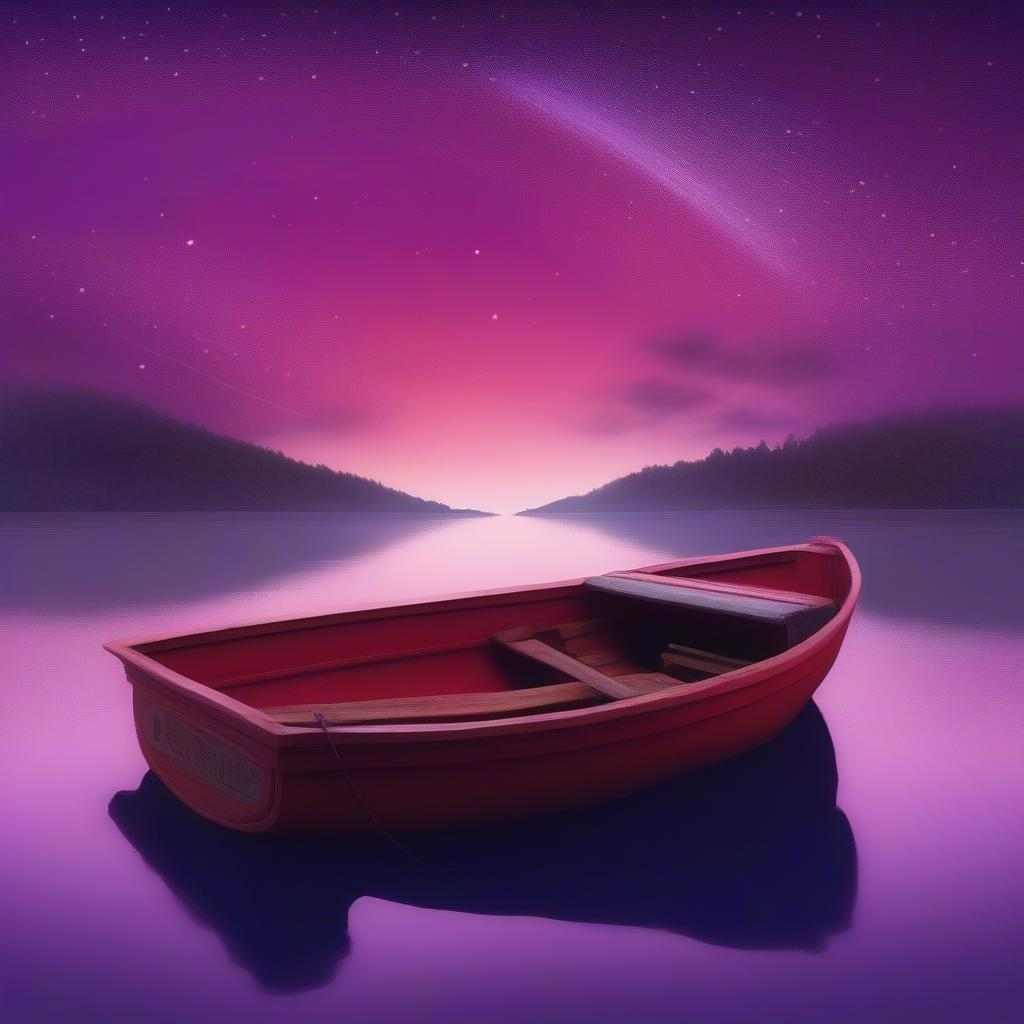

In [ ]:
from transformers import load_tool, ReactCodeAgent, HfEngine
from langchain.agents import load_tools

image_tools = load_tool("m-ric/text-to-image")

mistral_engine = HfEngine("mistralai/Mixtral-8x7B-Instruct-v0.1")
agent = ReactCodeAgent(tools=[image_tools], llm_engine= mistral_engine)

purple_alien = agent.run(
    "Generate an image of a violet boat on a lake, with a red comet in the sky.",
)
purple_alien

In [ ]:
from PIL import Image

img1 = Image.open("/tmp/tmp9642fup_/84a20ad1-643d-407a-9c98-60bf2f12e76b.png")
#img2 = Image.open("/tmp/tmpxle37hlw/0d82c312-1f6e-4311-8cad-40a0e947f8c5.png")
display(img1)
#display(img2)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmp9642fup_/84a20ad1-643d-407a-9c98-60bf2f12e76b.png'

In [ ]:
!pip install "accelerate>=0.16.0,<1" "transformers[torch]>=4.28.1,<5" "torch>=1.13.1,<2"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0+cu121
    Uninstalling torch-2.4.0+cu121:
      Successfully uninstalled torch-2.4.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.0+cu121 requires torch==2.4.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.19.0+cu121 requires torch==2.4.0, but you have torch 1.13.1 which is incompatible.


In [ ]:
!pip install torch -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 869.2 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1
    Uninstalling torch-2.4.1:
      Successfully uninstalled torch-2.4.1


In [ ]:
import torch
from transformers import pipeline

generate_text = pipeline(model="databricks/dolly-v2-3b", torch_dtype=torch.bfloat16, trust_remote_code=True, device_map="auto")


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

instruct_pipeline.py:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-3b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

In [ ]:
res = generate_text("Explain to me the difference between nuclear fission and fusion.")
print(res[0]["generated_text"])


Nuclear fission is a subatomic process in which one atom splits into two atoms. This is the process by which nuclear weapons are built. It releases massive amounts of energy, which can be used to create an atomic bomb.

Nuclear fusion is a subatomic process in which two atoms unite to form one larger atom. This results in the release of less energy than nuclear fission, but is able to produce more stable atomic nuclei. Fusion can power a hydrogen bomb, a device capable of destroying entire cities.

The transition from one form of energy to the other is called fusion. Atomic energy is dominated by nuclear fusion, whereas fission is more prevalent with the production of atomic bombs.
